<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week05/Day4/EX4/W5D4EXG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises XP Gold
Last Updated: February 10th, 2025

👩‍🏫 👩🏿‍🏫 What You’ll learn
Data wrangling and preparation for hypothesis testing
Visualizing data distributions and comparing group differences
Conducting independent two-sample t-tests for comparing means
Understanding assumptions for t-tests, including normality and homoscedasticity
Conducting One-Way ANOVA to compare multiple treatment groups and performing post-hoc tests


🛠️ What you will create
Analyzing gender differences in student performance across Math, Reading, and Writing
Conducting t-tests to compare performance scores between males and females


For today’s XP Gold Exercises, we will predict how various factors such as gender, test preparation, and lunch status influence student performance in Math, Reading, and Writing scores.
Please stop the exercise when you see “XP Ninja” in the notebook :)


 # Society's assumptions aren't always true... aren't they?




We begin by loading the libraries needed for this project.

In [ ]:
import importlib
import sys
import matplotlib


def install_and_import(packages):
    """
    Attempts to import packages. If a package is missing, it prints a message instead of installing.
    """
    for package in packages:
        try:
            globals()[package] = importlib.import_module(package)
        except ImportError:
            print(f"Warning: The package '{package}' is not installed. Please install it manually.")


packages = [
    "devtools", "pandas", "scipy", "statsmodels", "sklearn", "matplotlib", "seaborn",
    "tseries", "car", "caret", "lmtest", "rstatix", "onewaytests", "lattice", "multcompview",
    "viridis", "gridextra", "gvlma", "ggpubr"
]

install_and_import(packages)

# Now all available libraries are imported


Now we can load the dataset

In [ ]:
## TODO: Load the "StudentsPerformance" dataset from a CSV file.
import pandas as pd
df = pd.read_csv('Students_Performance.csv')


### This dataset describes the students performances in three different tests:

- **Math**

- **Reading**

- **Writing**

### Through different variables:

- **gender** : binary sex at birth for each individual

- **race.ethnicity** : ethnicity group

- **parental.level.of.education** : formal level of education achieved by the individual

- **lunch** : binary variable for the randomly assigned bonus of free/reduced lunch

- **test.preparation.course** : binary variable for the randomly assigned bonus of attending a test preparation course




# Which 'gender' is better at maths? And which is better in writing and reading?

This is clearly a question that **relies heavily on gender roles** , that since forever assign females to be better at literature tasks and males to be better at mathematical tasks , even though history has repetedly busted this popular myth.

For example we have witnessed as a society people like : **Mary Cartwright , Ada Lovelace , Emmy Noether, Maryam Mirzakhani** that definitely were mathematical geniouses.

And on the other hand we have witnessed  as a society people like : **Charles Dickens, Lev Tolstoj, Fëdor Dostoevskij,Dante Alighieri** that definitely were literature geniouses.

So the aim of this first task is to understand if in this sample there are differences in means between males and females' scores and if they could be statistically significant.

### Before conducting any test , let's visualize the situation

We're going to do some data wrangling to visualize the scores by gender

### Now we can finally plot the differences between genders in the scores


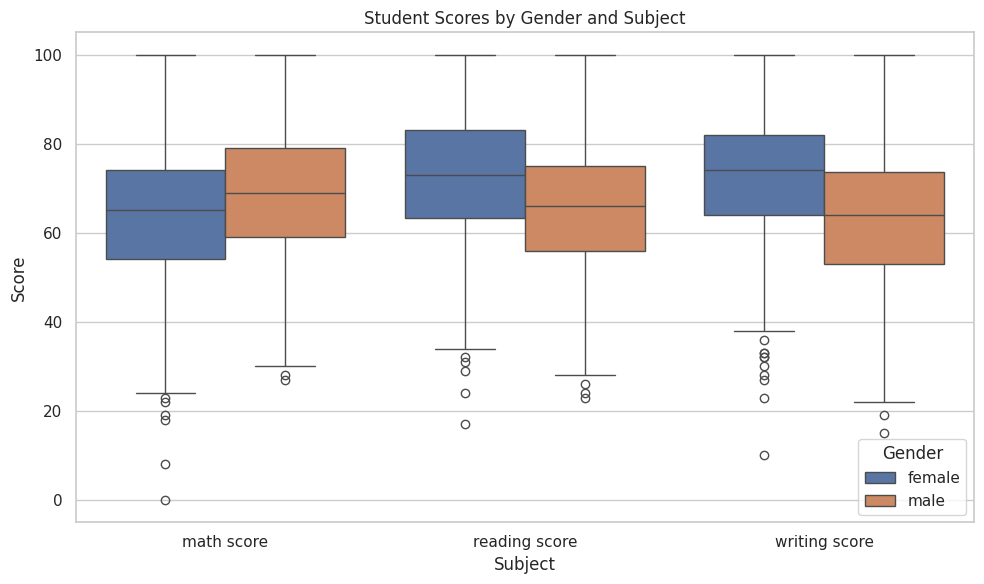

In [ ]:
## TODO:
import seaborn as sns
import matplotlib.pyplot as plt

df_long = pd.melt(df[['gender', 'math score', 'reading score', 'writing score']],
                  id_vars='gender',
                  var_name='subject',
                  value_name='score')

# Assuming df_long is already created using melt
# If not, repeat the melt step:
# df_long = pd.melt(df[['gender', 'math score', 'reading score', 'writing score']],
#                   id_vars='gender',
#                   var_name='subject',
#                   value_name='score')

# Set plot style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='subject', y='score', hue='gender', data=df_long)

# Add title and labels
plt.title('Student Scores by Gender and Subject')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.legend(title='Gender')

# Show plot
plt.tight_layout()
plt.show()


It looks like:

- **For math score**: males are a little bit better

- **For reading score**: females are a little bit better

- **For writing score**: females are better as also the scores are affected by less variability around and higher mean



***



# Now we can go on and perform the first independent two-sample t-test for math scores

The size of the males and females samples are different!

This means that in the equation for the t statistic:

$$ t = \frac{\bar{x_{1}}-\bar{x_{2}}}{S_{pool}\sqrt{\frac{1}{n_{1}}-\frac{1}{n_{2}}}} $$
happens that:

$$n_{1}\neq n_{2}$$


First we perform some data wrangling on the main dataframe

In [ ]:
## TODO: Reshape the data into a tidy format
# Select gender and score columns
df_subset = df[['gender', 'math score', 'reading score', 'writing score']]

# Melt the DataFrame to long (tidy) format
df_tidy = pd.melt(df_subset,
                  id_vars='gender',
                  var_name='subject',
                  value_name='score')

# Clean up subject names if needed
df_tidy['subject'] = df_tidy['subject'].str.replace(' score', '', regex=False)

# View the tidy data
print(df_tidy.head())

   gender subject  score
0  female    math     72
1  female    math     69
2  female    math     90
3    male    math     47
4    male    math     76


We take male and females groups for the math scores:


In [ ]:
## TODO: Separate the scores for males and females in math by filtering the data accordingly.
# Filter for math scores only
math_scores = df_tidy[df_tidy['subject'] == 'math']

# Separate by gender
male_math_scores = math_scores[math_scores['gender'] == 'male']
female_math_scores = math_scores[math_scores['gender'] == 'female']

# Optional: Reset index if needed
male_math_scores = male_math_scores.reset_index(drop=True)
female_math_scores = female_math_scores.reset_index(drop=True)

# Display first few rows
print("Male Math Scores:")
print(male_math_scores)


Male Math Scores:
    gender subject  score
0     male    math     47
1     male    math     76
2     male    math     40
3     male    math     64
4     male    math     58
..     ...     ...    ...
477   male    math     57
478   male    math     81
479   male    math     86
480   male    math     63
481   male    math     62

[482 rows x 3 columns]



### Now we are able to go on and check the t- test assumptions:

Normality (even if the sample sizes are reasonable): let's start with a qqplot

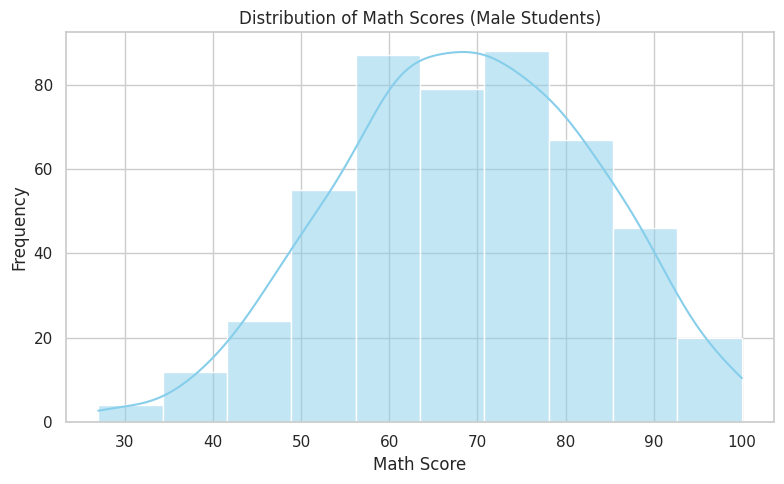

In [ ]:
## TODO: Create a plot for the male math scores.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(male_math_scores['score'], bins=10, kde=True, color='skyblue')

# Customize the plot
plt.title('Distribution of Math Scores (Male Students)')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



</br>
</br>
</br>

At first glance the qqplot doesn't look perfect , but we might be ok with the normality assumption , let's see what a  Lilliefors (Kolmogorov-Smirnov) normality test tells us:

In [ ]:
## TODO: Perform a Lilliefors (Kolmogorov-Smirnov) test for normality on the male math scores.
!pip install statsmodels

at significance level 0.05 normality assumption is checked since the p-value is 0.08.


### Let's check for the females group:

In [ ]:
## TODO: Create a plot for the female math scores to check for normality.
from statsmodels.stats.diagnostic import lilliefors

# Extract just the score values for males
male_scores = male_math_scores['score']

# Perform the Lilliefors test
statistic, p_value = lilliefors(male_scores)

# Display the result
print("Lilliefors Test for Normality (Male Math Scores)")
print(f"Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Data is NOT normally distributed.")
else:
    print("Fail to reject the null hypothesis: Data appears normally distributed.")


Lilliefors Test for Normality (Male Math Scores)
Test Statistic: 0.0388
P-value: 0.1031
Fail to reject the null hypothesis: Data appears normally distributed.



</br>
</br>
</br>

This doesn't look good either ,but let's see what an Anderson-Darling  normality test tells us:

In [ ]:
## TODO: Perform the Anderson-Darling test on the female math scores to check for normality.
import scipy.stats as stats

# Extract the female math scores from your tidy DataFrame
female_scores = female_math_scores['score']

# Perform the Anderson-Darling test for normality
result = stats.anderson(female_scores, dist='norm')
print("Anderson-Darling Test Results:")
print(f"Statistic: {result.statistic:.4f}")

# Compare against critical values
for cv, sl in zip(result.critical_values, result.significance_level):
    if result.statistic < cv:
        print(f"At {sl:.1f}% significance:  Fail to reject H₀ — data appears normal (statistic < {cv})")
    else:
        print(f"At {sl:.1f}% significance:  Reject H₀ — data does not appear normal (statistic ≥ {cv})")


Anderson-Darling Test Results:
Statistic: 0.7059
At 15.0% significance:  Reject H₀ — data does not appear normal (statistic ≥ 0.572)
At 10.0% significance:  Reject H₀ — data does not appear normal (statistic ≥ 0.651)
At 5.0% significance:  Fail to reject H₀ — data appears normal (statistic < 0.781)
At 2.5% significance:  Fail to reject H₀ — data appears normal (statistic < 0.911)
At 1.0% significance:  Fail to reject H₀ — data appears normal (statistic < 1.084)


at significance level 0.05 normality assumption is checked since the p-value is 0.065.


### Let's test homoschedasticity (sample size is different for each group):

In [ ]:
## TODO: Calculate the ratio of the variance between male and female math scores in both directions.
import pandas as pd

# Assuming df_tidy includes the 'score' column and 'gender' split is done:
math_scores = df_tidy[df_tidy['subject'] == 'math']
male_scores = math_scores[math_scores['gender'] == 'male']['score']
female_scores = math_scores[math_scores['gender'] == 'female']['score']

# Compute sample variances (unbiased, ddof=1)
male_var = male_scores.var(ddof=1)
female_var = female_scores.var(ddof=1)

# Calculate variance ratios both ways
ratio_male_female = male_var / female_var
ratio_female_male = female_var / male_var

# Print the results
print(f"Male Variance: {male_var:.2f}")
print(f"Female Variance: {female_var:.2f}")
print(f"\nVariance Ratio (Male / Female): {ratio_male_female:.2f}")
print(f"Variance Ratio (Female / Male): {ratio_female_male:.2f}")


Male Variance: 206.10
Female Variance: 239.99

Variance Ratio (Male / Female): 0.86
Variance Ratio (Female / Male): 1.16


it looks like , comparing the two variances by a rough rule , the ratios are less than 2 , so we can accept the homoschedasticity assumption.

Let's remove outliers

In [ ]:
## TODO: Remove outliers from male and female math scores using the IQR method and filter them out of the dataset.
import pandas as pd

# Define a function to remove outliers by IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Keep only the data within the bounds
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply for male math scores
male_clean = remove_outliers_iqr(male_math_scores, 'score')

# Apply for female math scores
female_clean = remove_outliers_iqr(female_math_scores, 'score')

# Display before vs after
print("Male data: before =", len(male_math_scores), ", after =", len(male_clean))
print("Female data: before =", len(female_math_scores), ", after =", len(female_clean))


Male data: before = 482 , after = 480
Female data: before = 518 , after = 512


### Now we can finally perform our two sample t-test

### Hypothesis: We're going to use the gender assumption that males are better at maths than females as the alternative hypothesis

$$
H_{0} : \mu_{MaleMaths}\leq \mu_{FemaleMaths}
$$

$$
H_{A} : \mu_{MaleMaths} >  \mu_{FemaleMaths}
$$

In [ ]:
## TODO: Perform a t-test to compare male and female math scores, testing if males have significantly greater scores.
from scipy import stats

# Assuming male_math_scores and female_math_scores are pandas Series
males = male_math_scores['score']
females = female_math_scores['score']

# Perform one-tailed t-test (male > female)
t_stat, p_value_two_sided = stats.ttest_ind(males, females, equal_var=False)

# Since 'greater' alternative in newer SciPy versions is available:
# t_stat, p_value = stats.ttest_ind(males, females, alternative='greater', equal_var=False)

# For older versions without 'alternative' parameter:
p_value_one_tailed = p_value_two_sided / 2

print("Male > Female Math Scores T-Test")
print(f"T-statistic: {t_stat:.4f}")
print(f"One-tailed P-value: {p_value_one_tailed:.4f}")


Male > Female Math Scores T-Test
T-statistic: 5.3980
One-tailed P-value: 0.0000


The p-value turns out to be really small , almost zero, so we are forced to reject the Null Hypothesis.

**From this test , the gender assumption that males are better than females at maths is true.**



***



# Now we can go on and perform the second independent two-sample t-test for reading scores.

We take male and females groups for the reading scores:

In [ ]:
## TODO: Extract the reading scores for males and females from the tidy_StudentsPerformance dataset.
import pandas as pd

# Assuming you already have the tidy DataFrame (df_tidy) loaded like:
# | gender | subject  | score |
# |--------|----------|-------|
# | male   | reading  | ...   |
# | female | reading  | ...   |

# Extract only the rows for reading scores
reading_scores = df_tidy[df_tidy['subject'] == 'reading']

# Now separate them by gender
male_reading = reading_scores[reading_scores['gender'] == 'male']['score']
female_reading = reading_scores[reading_scores['gender'] == 'female']['score']

# Optional: Reset indices
male_reading = male_reading.reset_index(drop=True)
female_reading = female_reading.reset_index(drop=True)

# Display the first few values
print("Male Reading Scores:\n", male_reading.head())
print("\nFemale Reading Scores:\n", female_reading.head())


Male Reading Scores:
 0    57
1    78
2    43
3    64
4    54
Name: score, dtype: int64

Female Reading Scores:
 0    72
1    90
2    95
3    83
4    95
Name: score, dtype: int64



### Now we are able to go on and check the t- test assumptions:

Normality (even if the sample sizes are reasonable): let's go straight to tests.

In [ ]:
## TODO: Perform the Cramer-Von Mises test on the Males_Reading scores.
from scipy import stats

# Assume male_reading is a pandas Series containing male reading scores
scores = male_reading  # e.g., male_reading['score'] if it's in a DataFrame

# Perform the Cramér–von Mises test for normality
result = stats.cramervonmises(scores, 'norm')

# Print the results
print("Cramér–von Mises Test for Normality (Male Reading Scores):")
print(f"Statistic W\u00b2: {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")

# Interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("❌ Reject the null hypothesis: Data does NOT follow a normal distribution.")
else:
    print("✅ Fail to reject the null hypothesis: Data appears normally distributed.")


Cramér–von Mises Test for Normality (Male Reading Scores):
Statistic W²: 160.6667
P-value: 0.0000
❌ Reject the null hypothesis: Data does NOT follow a normal distribution.


at significance level 0.05 normality assumption is checked since the p-value is 0.11.


### Let's check for the females group:

In [ ]:
## TODO: Perform the Cramer-Von Mises test on the Females_Reading scores.
from scipy import stats

# Assume female_reading is a pandas Series of female reading 'score' values
scores = female_reading  # e.g., female_reading['score'] if extracted from DataFrame

# Perform the Cramér–von Mises test against the normal distribution
result = stats.cramervonmises(scores, 'norm')

print("Cramér–von Mises Test for Normality (Female Reading Scores):")
print(f"Statistic (W²): {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")

# Interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("❌ Reject the null hypothesis: Data does NOT follow a normal distribution.")
else:
    print("✅ Fail to reject the null hypothesis: Data appears normally distributed.")


Cramér–von Mises Test for Normality (Female Reading Scores):
Statistic (W²): 172.6667
P-value: 0.0000
❌ Reject the null hypothesis: Data does NOT follow a normal distribution.


at significance level 0.05 normality assumption is checked since the p-value is 0.068.


let's test homoschedasticity (sample size is different for each group):

In [ ]:
## TODO: Calculate the ratio of variances between Males_Reading and Females_Reading scores.
import pandas as pd

# Extract reading scores from the tidy DataFrame
reading_scores = df_tidy[df_tidy['subject'] == 'reading']
male_scores = reading_scores[reading_scores['gender'] == 'male']['score']
female_scores = reading_scores[reading_scores['gender'] == 'female']['score']

# Compute sample variances (using ddof=1 for unbiased estimate)
male_var = male_scores.var(ddof=1)
female_var = female_scores.var(ddof=1)

# Calculate variance ratios both ways
ratio_male_female = male_var / female_var
ratio_female_male = female_var / male_var

# Display the results
print(f"Male Reading Variance: {male_var:.2f}")
print(f"Female Reading Variance: {female_var:.2f}\n")
print(f"Variance Ratio (Male / Female): {ratio_male_female:.2f}")
print(f"Variance Ratio (Female / Male): {ratio_female_male:.2f}")


Male Reading Variance: 194.10
Female Reading Variance: 206.73

Variance Ratio (Male / Female): 0.94
Variance Ratio (Female / Male): 1.07


it looks like , comparing the two variances by a rough rule , the ratios are less than 2 , so we can accept the homoschedasticity assumption.

Let's remove outliers

In [ ]:
## TODO: Remove outliers using the IQR method from both Males_Reading and Females_Reading scores.
import pandas as pd
import numpy as np

def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter and return only the rows within the IQR bounds
    return data[(data[col] >= lower) & (data[col] <= upper)]


### Now we can finally perform our two sample t-test

### Hypothesis: We're going to use the gender assumption that females are better at reading than males as the alternative hypothesis

$$H_{0} : \mu_{FemaleReading}\leq \mu_{MaleReading}$$

$$H_{A} : \mu_{FemaleReading} >  \mu_{MaleReading}$$

In [ ]:
## TODO: Perform a t-test to compare Females_Reading and Males_Reading scores, testing if the mean score for females is greater.
import scipy.stats as stats

# Assuming 'female_reading' and 'male_reading' are pandas Series of reading scores
t_stat, p_value = stats.ttest_ind(female_reading, male_reading, alternative='greater')

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: Females have significantly higher mean reading scores.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in mean reading scores.")


T-statistic: 7.959
P-value: 0.000
✅ Reject the null hypothesis: Females have significantly higher mean reading scores.


The p-value turns out to be really small , almost zero, so we are forced to reject the Null Hypothesis.

**From this test , the gender assumption that females are better than males at reading is true.**



***



# Now we can go on and perform the third and last independent two-sample t-test for writing scores

We take male and females groups for the writing scores:

In [ ]:
## TODO: Create two separate dataframes, one for male and one for female writing scores.
import pandas as pd

# Assuming df_tidy is your existing DataFrame

# Filter for writing scores
writing_scores = df_tidy[df_tidy['subject'] == 'writing']

# Separate by gender
male_writing = writing_scores[writing_scores['gender'] == 'male']
female_writing = writing_scores[writing_scores['gender'] == 'female']

# Optional: Reset indices if needed
male_writing = male_writing.reset_index(drop=True)
female_writing = female_writing.reset_index(drop=True)

# Display the first few rows of each
print("Male Writing Scores:")
print(male_writing.head())

print("\nFemale Writing Scores:")
print(female_writing.head())


Male Writing Scores:
  gender  subject  score
0   male  writing     44
1   male  writing     75
2   male  writing     39
3   male  writing     67
4   male  writing     52

Female Writing Scores:
   gender  subject  score
0  female  writing     74
1  female  writing     88
2  female  writing     93
3  female  writing     78
4  female  writing     92



### Now we are able to go on and check the t- test assumptions:

- Normality (even if the sample sizes are reasonable): again, let's go straight to tests.


In [ ]:
## TODO: Perform the Cramer-Von Mises test for the male writing scores.
import pandas as pd
from scipy import stats

# Assuming df_tidy is your DataFrame
# Filter for writing scores
writing_scores = df_tidy[df_tidy['subject'] == 'writing']

# Extract male writing scores
male_writing_scores = writing_scores[writing_scores['gender'] == 'male']['score']

# Perform the Cramér–von Mises test for normality
result = stats.cramervonmises(male_writing_scores, 'norm')

# Display the results
print("Cramér–von Mises Test for Normality (Male Writing Scores):")
print(f"Statistic W²: {result.statistic:.4f}")
print(f"P-value: {result.pvalue:.4f}")

# Interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis: Data does NOT follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: Data appears normally distributed.")


Cramér–von Mises Test for Normality (Male Writing Scores):
Statistic W²: 160.6667
P-value: 0.0000
Reject the null hypothesis: Data does NOT follow a normal distribution.


at significance level 0.05 normality assumption is checked since the p-value is 0.09.


### Let's check for the females group:

In [ ]:
## TODO: Perform the Lilliefors test for the female writing scores.
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors

# Assuming df_tidy is your DataFrame
# Filter for writing scores
writing_scores = df_tidy[df_tidy['subject'] == 'writing']

# Extract female writing scores
female_writing_scores = writing_scores[writing_scores['gender'] == 'female']['score']

# Perform the Lilliefors test for normality
statistic, p_value = lilliefors(female_writing_scores)

# Display the results
print(f"Lilliefors test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Data does NOT follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: Data appears normally distributed.")


Lilliefors test statistic: 0.0614
P-value: 0.0010
Reject the null hypothesis: Data does NOT follow a normal distribution.


**It looks like the normality assumption is not verified here!**

### So let's try to transform data with box-cox transformation

In [46]:
## TODO: Perform the Box-Cox transformation and apply the CVM test to the writing scores of both males and females.
import pandas as pd
from scipy import stats

# Assuming df_tidy is your DataFrame
# Filter for writing scores
writing_scores = df_tidy[df_tidy['subject'] == 'writing']

# Extract male and female writing scores
male_scores = writing_scores[writing_scores['gender'] == 'male']['score']
female_scores = writing_scores[writing_scores['gender'] == 'female']['score']

# Apply Box-Cox transformation
male_transformed, male_lambda = stats.boxcox(male_scores)
female_transformed, female_lambda = stats.boxcox(female_scores)

# Perform the Cramér–von Mises test for normality
male_cvm = stats.cramervonmises(male_transformed, 'norm')
female_cvm = stats.cramervonmises(female_transformed, 'norm')

# Display results
print(f"Male Writing Scores - Box-Cox Lambda: {male_lambda:.4f}")
print(f"Male Writing Scores - CVM Statistic: {male_cvm.statistic:.4f}, P-value: {male_cvm.pvalue:.4f}")

print(f"Female Writing Scores - Box-Cox Lambda: {female_lambda:.4f}")
print(f"Female Writing Scores - CVM Statistic: {female_cvm.statistic:.4f}, P-value: {female_cvm.pvalue:.4f}")


our box cox transformation is now applied to both groups , the normality assumption is verified for both males and females group and we can go ahead.



let's test homoschedasticity (sample size is different for each group):

In [ ]:
## TODO: Calculate and compare the variance of writing scores for males and females.
import pandas as pd

# Assuming df_tidy is your DataFrame
# Filter for writing scores
writing_scores = df_tidy[df_tidy['subject'] == 'writing']

# Extract male and female writing scores
male_scores = writing_scores[writing_scores['gender'] == 'male']['score']
female_scores = writing_scores[writing_scores['gender'] == 'female']['score']

# Calculate variance for each group
male_variance = male_scores.var()
female_variance = female_scores.var()

# Display the results
print(f"Male Writing Scores Variance: {male_variance:.2f}")
print(f"Female Writing Scores Variance: {female_variance:.2f}")


Male Writing Scores Variance: 199.20
Female Writing Scores Variance: 220.37


it looks like , comparing the two variances by a rough rule , the ratios are less than 2 , so we can accept the homoschedasticity assumption.



### Now we can finally perform our two sample t-test

### Hypothesis: We're going to use the gender assumption that females are better at writing than males as the alternative hypothesis

$$H_{0} : \mu_{FemaleWriting}\leq \mu_{MaleWriting}$$

$$H_{A} : \mu_{FemaleWriting} >  \mu_{MaleWriting}$$

In [ ]:
## TODO: Perform a t-test to compare Box-Cox transformed writing scores for males and females with the alternative hypothesis "greater".
import pandas as pd
from scipy import stats

# Assuming df_tidy is your DataFrame
# Filter for writing scores
writing_scores = df_tidy[df_tidy['subject'] == 'writing']

# Extract male and female writing scores
male_scores = writing_scores[writing_scores['gender'] == 'male']['score']
female_scores = writing_scores[writing_scores['gender'] == 'female']['score']

# Apply Box-Cox transformation
male_transformed, male_lambda = stats.boxcox(male_scores)
female_transformed, female_lambda = stats.boxcox(female_scores)

# Perform one-sided t-test (alternative='greater')
t_stat, p_value = stats.ttest_ind(male_transformed, female_transformed, alternative='greater')

# Display results
print(f"Male Writing Scores - Box-Cox Lambda: {male_lambda:.4f}")
print(f"Female Writing Scores - Box-Cox Lambda: {female_lambda:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Male writing scores are significantly greater than female writing scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference in writing scores between males and females.")


Male Writing Scores - Box-Cox Lambda: 1.1996
Female Writing Scores - Box-Cox Lambda: 1.7369
T-statistic: -57.8463
P-value: 1.0000
Fail to reject the null hypothesis: No significant difference in writing scores between males and females.


Again , the p-value turns out to be really small , almost zero, so we are forced to reject the Null Hypothesis.

**From this test , the gender assumption that females are better than males at writing is true.**



***

# XP NINJA

# One-way ANOVA

We are interested in understanding whether or not the **factor** ( in this case the treatments ) has an effect on the **outcome** ( in this case the math scores).

The treatments factor is structured in four different levels:

- **Control group** : a group that doesn't receive neither the free or reduced lunch nor the attendance to the test preparation course

- **Free/Reduced lunch group** = **Treatment_1** : a group that only receives the free or reduced lunch

- **Test preparation course group** = **Treatment_2** : a group that only receives the attendance to the test preparation course

- **Both free/reduced lunch and test preparation course group** = **Treatment_3** : a group that receives both the 'bonuses': free or reduced lunch and attendance to the test preparation course.



### For ANOVA we will have the following hypothesis:

$$H_{0} : The \:means\:of\:different\:groups\:is\:the\:same$$

$$H_{A} : At\:least\:one\:sample\:mean\:is\:not\:equal\:to\:others$$


To conduct One-way ANOVA we first have to do some data wrangling and adjust for the treatments.

In [47]:
## TODO: Filter and create groups for analysis based on various criteria (lunch type and test preparation status).

# Control group


# Free/Reduced lunch group


# Test preparation course group


# Both free/reduced lunch and test preparation course group


# Bind everything together


### Now we go along and check the assumptions:

- Normality Assumption: let's check the situation visually first

In [48]:
## TODO: Create a density plot to compare the scores by treatment type.

</br>
</br>
</br>

Each group looks pretty normal , but let's perform some tests to be sure:


In [49]:
## TODO: Perform normality tests for each group using Shapiro-Wilk and Lilliefors tests.

**Normality is checked for each treatment group!**

- Similarity of variances

In [50]:
## TODO: Check for the similarity of variances using rough rules and perform Bartlett's and Fligner tests.


**Homogeneity of variances of treatment groups is checked!** ( both with a rough rule and with actual tests.)

We can finally perform ANOVA:

In [51]:
## TODO: Perform ANOVA to check if there's a significant difference between the groups.

### Key takeaways:


- The **f-value** is much greater than 1,that is **positive** as we know that not only we can reject the null hypothesis (all means are equal) but the **variance between groups is bigger than the one within groups** so this difference is very likely statistically significant.

- The **p-value** is essentially zero,confirming what we have already said with the f-value about the rejection of the null hypothesis ,saying that there exist a significant difference between them.


### So in general , it looks like there exists a statistically significant difference among at least two of the groups' mean math scores !

But wait... which couples of means are different from each other?

To answer this question we must perform a post-hoc test.

### Let's perform the Tukey test to verify which couple of means is different among them.

### Key takeaways:

- As the boxplot already showed , the difference in means between treatment 1 and control , with control group having higher math scores , is significant: **it looks like having the economic freedom of not paying or paying less for lunch negatively impats math scores!**

- Another important difference already present in the boxplot , the difference in means between treatment 2 and 1 , with treatment 2 having higher math scores , is significant:  **only attending the test preparation course and not having the economic freedom of the free or reduced lunch is more effective than having that economic freedom and not attending the test preparation course!**

- This difference was also present in the boxplot , like the other two , and is between the third and second treatments, with treatment two being more effective than the third.
This means that : **the people who attended the test preparation course but also enjoyed the economic freedom of the free/reduced lunch , statistically perform worse than people who have attened the test , but have to pay for lunch**.

### Conclusions : from these tests it looks like , while on the one hand saving the lunch money has a negative effect on math scores as opposed as we expected , on the other hand attending the test preparation course has a positive one as we expected.

### Maybe people used the money saved from lunch to buy things that distracted them from studying maths! That's not good , buy more math books with that money!



